In [8]:
#importing json file
import json
with open('./data/world_cup_2018.json', encoding = 'utf-8') as f:
    data_wc = json.load(f)
#print(data_wc['rounds'][1]['matches'][0])
#creating a list of winners from the round data
low = []
for match_day in data_wc['rounds']:
    for match in match_day['matches']:
        team_1 = match['team1']['name']
        team_2 = match['team2']['name']
        score_1 = match['score1'] + match['score1i']
        score_2 = match['score2'] + match['score2i']
        if score_1 > score_2:
            winner = team_1
        elif score_2 > score_1:
            winner = team_2
        elif score_1 == score_2:
            winner = 'draw' + ' btw '+ team_1 + ' and ' + team_2
        low.append(winner)
print(low)

['Russia', 'Uruguay', 'Portugal', 'Iran', 'France', 'Denmark', 'draw btw Argentina and Iceland', 'Croatia', 'Brazil', 'Serbia', 'Mexico', 'Sweden', 'Belgium', 'England', 'Senegal', 'Japan', 'Russia', 'Uruguay', 'Portugal', 'Spain', 'France', 'draw btw Denmark and Australia', 'Croatia', 'Nigeria', 'Brazil', 'draw btw Serbia and Switzerland', 'draw btw Germany and Sweden', 'Mexico', 'Belgium', 'England', 'Colombia', 'draw btw Japan and Senegal', 'Uruguay', 'Saudi Arabia', 'Portugal', 'draw btw Spain and Morocco', 'draw btw Denmark and France', 'Peru', 'Argentina', 'Croatia', 'Brazil', 'Switzerland', 'South Korea', 'Sweden', 'Belgium', 'draw btw Panama and Tunisia', 'Poland', 'Colombia', 'Uruguay', 'France', 'draw btw Spain and Russia', 'draw btw Croatia and Denmark', 'Brazil', 'Belgium', 'Sweden', 'draw btw Colombia and England', 'France', 'Belgium', 'draw btw Russia and Croatia', 'England', 'France', 'England', 'Belgium', 'France']


In [9]:
#importing csv file of populations
#'', 'Country Name', 'Country Code', 'Year', 'Value'
#Year == [3]
import csv
#importing all the data
pop_unsorted = []
with open('./data/country_populations.csv') as f:
    data_pop = csv.reader(f)
    for row in data_pop:
        pop_unsorted.append(row)
#creating the sorted list with only 2018 data
pop_sorted = []
for datum in pop_unsorted:
    if datum[3] == '2018':
        pop_sorted.append(datum)
print(pop_sorted[:10])

[['2772', 'Afghanistan', 'AFG', '2018', '37172386'], ['2831', 'Albania', 'ALB', '2018', '2866376'], ['2890', 'Algeria', 'DZA', '2018', '42228429'], ['2949', 'American Samoa', 'ASM', '2018', '55465'], ['3008', 'Andorra', 'AND', '2018', '77006'], ['3067', 'Angola', 'AGO', '2018', '30809762'], ['3126', 'Antigua and Barbuda', 'ATG', '2018', '96286'], ['3185', 'Argentina', 'ARG', '2018', '44494502'], ['3244', 'Armenia', 'ARM', '2018', '2951776'], ['3303', 'Aruba', 'ABW', '2018', '105845']]


In [10]:
#list of teams
lot = []
for round in data_wc['rounds']:
    for match in round['matches']:
        team1 = match['team1']['name']
        team2 = match['team2']['name']
        if team1 not in lot:
            lot.append(team1)
        if team2 not in lot:
            lot.append(team2)
lot = sorted(lot)
print(lot)

['Argentina', 'Australia', 'Belgium', 'Brazil', 'Colombia', 'Costa Rica', 'Croatia', 'Denmark', 'Egypt', 'England', 'France', 'Germany', 'Iceland', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Nigeria', 'Panama', 'Peru', 'Poland', 'Portugal', 'Russia', 'Saudi Arabia', 'Senegal', 'Serbia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Tunisia', 'Uruguay']


In [11]:
#creating list of teams connected to 2018 pop
team_2018_pop = []
for team in lot:
    for datum in pop_sorted:
        if datum[1] == team:
            team_2018_pop.append({'name' : team , '2018_pop' : int(datum[4])})
#creating list of teams and number of games won
team_performance = []
for team in lot:
    num_wins = 0
    for winner in low:
        if winner == team:
            num_wins += 1
    team_performance.append({'name' : team , 'num_wins' : num_wins})
#print(team_2018_pop)
#adding 2018_pop to the list of team performance
for team in team_performance:
    name = team['name']
    for country in team_2018_pop:
        if country['name'] == name:
            pop = country['2018_pop']
    team['2018_pop'] = pop
print(team_performance)

[{'name': 'Argentina', 'num_wins': 1, '2018_pop': 44494502}, {'name': 'Australia', 'num_wins': 0, '2018_pop': 24982688}, {'name': 'Belgium', 'num_wins': 6, '2018_pop': 11433256}, {'name': 'Brazil', 'num_wins': 4, '2018_pop': 209469333}, {'name': 'Colombia', 'num_wins': 2, '2018_pop': 49648685}, {'name': 'Costa Rica', 'num_wins': 0, '2018_pop': 4999441}, {'name': 'Croatia', 'num_wins': 3, '2018_pop': 4087843}, {'name': 'Denmark', 'num_wins': 1, '2018_pop': 5793636}, {'name': 'Egypt', 'num_wins': 0, '2018_pop': 5793636}, {'name': 'England', 'num_wins': 4, '2018_pop': 5793636}, {'name': 'France', 'num_wins': 6, '2018_pop': 66977107}, {'name': 'Germany', 'num_wins': 0, '2018_pop': 82905782}, {'name': 'Iceland', 'num_wins': 0, '2018_pop': 352721}, {'name': 'Iran', 'num_wins': 1, '2018_pop': 352721}, {'name': 'Japan', 'num_wins': 1, '2018_pop': 126529100}, {'name': 'Mexico', 'num_wins': 2, '2018_pop': 126190788}, {'name': 'Morocco', 'num_wins': 0, '2018_pop': 36029138}, {'name': 'Nigeria', '

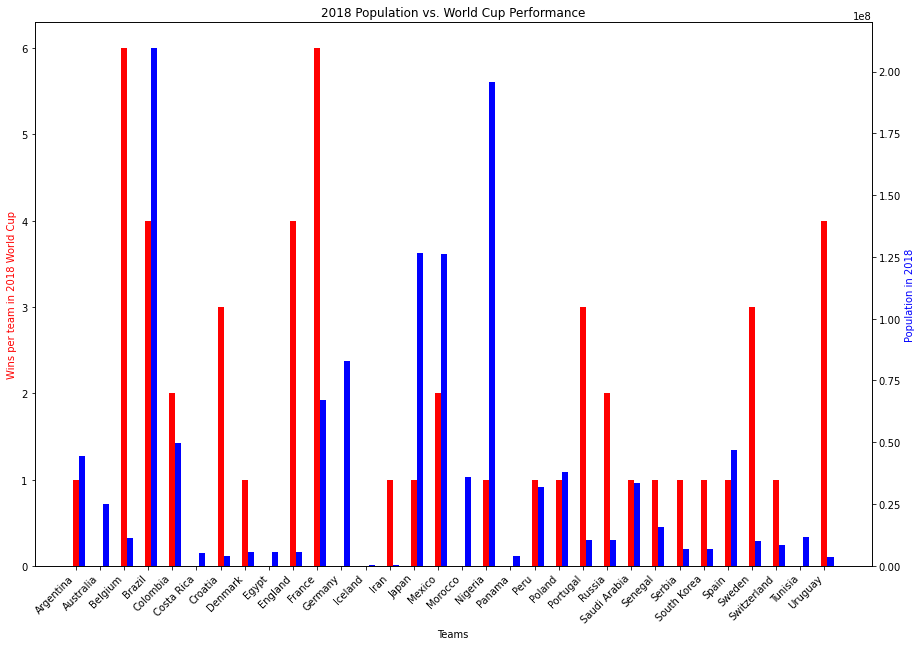

In [27]:
#putting the data into lists for plotting purposes
names = []
wins = []
pop_2018 = []
for team in team_performance:
    names.append(team['name'])
    wins.append(team['num_wins'])
    pop_2018.append(team['2018_pop'])
#plotting the data using matplotlib
import matplotlib.pyplot as plt
import numpy as np
X = np.arange(len(names))
fig, ax1 = plt.subplots()
fig.set_size_inches(15,10)
plt.title('2018 Population vs. World Cup Performance')
plt.xticks(X, names, rotation = 45, ha='right')
ax1.set_ylabel('Wins per team in 2018 World Cup', color = 'r')
ax1.set_xlabel('Teams')
bar1 = ax1.bar(X, wins, 0.25, color = 'r')
ax2 = ax1.twinx()
ax2.set_ylabel('Population in 2018', color = 'blue')
bar2 = ax2.bar(X+0.25, pop_2018, 0.25, color = 'b')
plt.show();

In [26]:
#defining functions to implement correlation measures
import math
import itertools
sample_set = [13, 6, 7, 4, 20]
def get_mean(x):
    den = len(x)
    num = 0
    for number in x:
        num += number
    mean = num / den
    return mean
def get_variance(x):
    mean = get_mean(x)
    list_of_variances = []
    for number in x:
        this_var = (number - mean)**2
        list_of_variances.append(this_var)
    variance = get_mean(list_of_variances)
    return variance
def get_covariance(x, y):
    mean_x = get_mean(x)
    mean_y = get_mean(y)
    covariance_list = []
    for (num_x, num_y) in zip(x, y):
        this_cov = (num_x - mean_x) * (num_y - mean_y)
        covariance_list.append(this_cov)
    covariance = get_mean(covariance_list)
    return covariance
def get_correlation(x, y):
    var_x = get_variance(x)
    var_y = get_variance(y)
    numerator = get_covariance(x, y)
    denominator = math.sqrt(var_x * var_y)
    return (numerator / denominator)
master_correlation = get_correlation(wins, pop_2018)
print(master_correlation)

0.11968567715899546


In [ ]:
# The overall correlation value between 2018 population and 2018 world cup wins is 0.119685. This is a small, positive, value
# which indicates that there is a weak positive correlation between population and success in the world cup